In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA for Customers data

In [308]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
file_path_1 = '/content/drive/MyDrive/Dataset_Zeotap/Customers.csv'
df_1 = pd.read_csv(file_path_1)

In [310]:
df_1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [311]:
df_1.shape

(200, 4)

In [312]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [313]:
df_1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [314]:
df_1.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


**From the above information we can see there is no null values in the dataset**

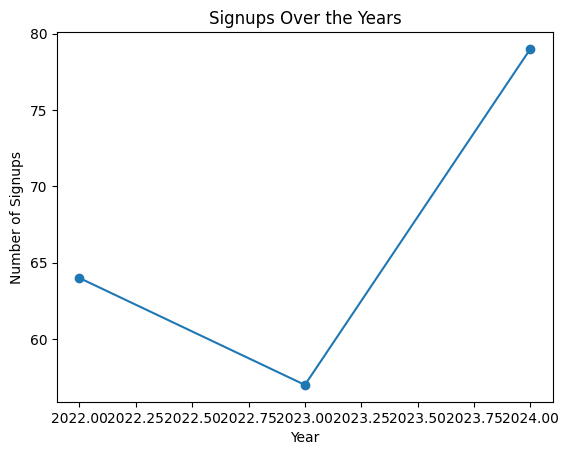

In [315]:
# Convert signup date to datetime
df_1['SignupDate'] = pd.to_datetime(df_1['SignupDate'])

# Extract useful information
df_1['signup year'] = df_1['SignupDate'].dt.year
df_1['signup month'] = df_1['SignupDate'].dt.month
df_1['signup day'] = df_1['SignupDate'].dt.day

# Check the distribution of signups over time
signup_trend = df_1['signup year'].value_counts().sort_index()
signup_trend.plot(kind='line', marker='o', title='Signups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


### Transactions dataset

In [316]:
file_path_2 = '/content/drive/MyDrive/Dataset_Zeotap/Transactions.csv'
df_2 = pd.read_csv(file_path_2)

In [317]:
df_2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [318]:
df_2.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


In [319]:
df_2.shape

(1000, 7)

In [320]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [321]:
df_2.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [322]:
df_2['TransactionDate'] = pd.to_datetime(df_2['TransactionDate'])
df_2['YearMonth'] = df_2['TransactionDate'].dt.to_period('M')

### Products dataset

In [323]:
file_path_3 = '/content/drive/MyDrive/Dataset_Zeotap/Products.csv'
df_3 = pd.read_csv(file_path_3)

In [324]:
df_3.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [325]:
df_3.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [326]:
df_3.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [327]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [328]:
df_3.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


### Combined EDA

In [329]:
print(df_1.columns)
print(df_2.columns)
print(df_3.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'signup year',
       'signup month', 'signup day'],
      dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'YearMonth'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


In [330]:
#Merging the dataset
customer_transaction = pd.merge(df_1, df_2, on='CustomerID', how='inner')

df = pd.merge(customer_transaction, df_3, on='ProductID', how='inner')

In [331]:
df

,CustomerID,CustomerName,Region,SignupDate,signup year,signup month,signup day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,2024-01,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,2024-09,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,2024-04,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,2024-05,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2024-11,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2024-12,HomeSense T-Shirt,Clothing,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2024-04,ActiveWear Smartphone,Electronics,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2024-07,HomeSense Desk Lamp,Home Decor,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2024-09,TechPro Cookbook,Books,416.40


In [332]:
df.drop(columns=['Price_y'], inplace= True)
df.rename(columns={'Price_x': 'Price'}, inplace=True)

In [333]:
df

,CustomerID,CustomerName,Region,SignupDate,signup year,signup month,signup day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,2024-01,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,2024-09,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,2024-04,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,2024-05,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2024-11,TechPro Headphones,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2024-12,HomeSense T-Shirt,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2024-04,ActiveWear Smartphone,Electronics
997,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2024-07,HomeSense Desk Lamp,Home Decor
998,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2024-09,TechPro Cookbook,Books


In [334]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,signup year,signup month,signup day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,2024-01,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,2024-09,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,2024-04,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,2024-05,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,7,10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2024-11,TechPro Headphones,Electronics


In [335]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate,signup year,signup month,signup day,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth,ProductName,Category
995,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2024-12,HomeSense T-Shirt,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2024-04,ActiveWear Smartphone,Electronics
997,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2024-07,HomeSense Desk Lamp,Home Decor
998,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2024-09,TechPro Cookbook,Books
999,C0200,Kelly Cross,Asia,2023-06-11,2023,6,11,T00889,P064,2024-10-03 04:33:16,3,1357.26,452.42,2024-10,HomeSense Running Shoes,Clothing


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   datetime64[ns]
 4   signup year      1000 non-null   int32         
 5   signup month     1000 non-null   int32         
 6   signup day       1000 non-null   int32         
 7   TransactionID    1000 non-null   object        
 8   ProductID        1000 non-null   object        
 9   TransactionDate  1000 non-null   datetime64[ns]
 10  Quantity         1000 non-null   int64         
 11  TotalValue       1000 non-null   float64       
 12  Price            1000 non-null   float64       
 13  YearMonth        1000 non-null   period[M]     
 14  ProductName      1000 non-null   object  

In [337]:
df.shape

(1000, 16)

In [338]:
df.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
signup year,0
signup month,0
signup day,0
TransactionID,0
ProductID,0
TransactionDate,0


#### Univariate Analysis

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


<Axes: xlabel='Region'>

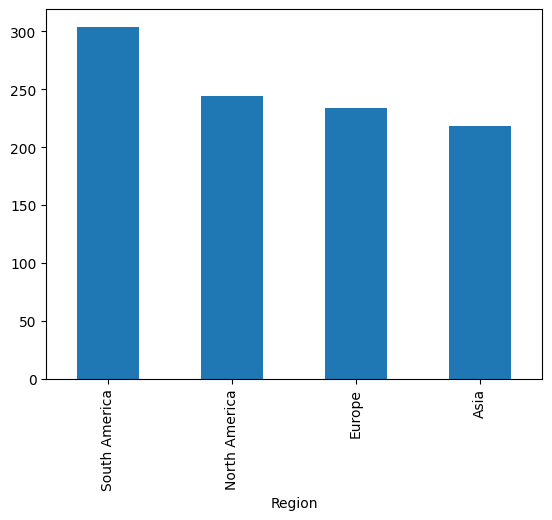

In [339]:
print(df['Region'].value_counts())
df['Region'].value_counts().plot(kind='bar')

***We have high number of transaction on the region of South America***

***We have high number of signups on the month of September, April and May***

In [340]:
print(df['Category'].value_counts())

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [341]:
print(df['ProductName'].value_counts().head(10))

ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
SoundWave Cookbook       29
ActiveWear Rug           29
HomeSense Desk Lamp      28
ActiveWear Jacket        26
TechPro Textbook         25
TechPro T-Shirt          24
SoundWave Desk Lamp      23
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

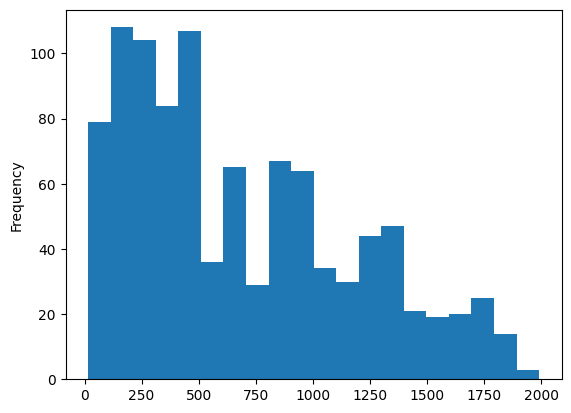

In [342]:
df['TotalValue'].plot(kind='hist', bins=20)

***We can see a high number of Transactions in the range of 250 to 500***

<Axes: >

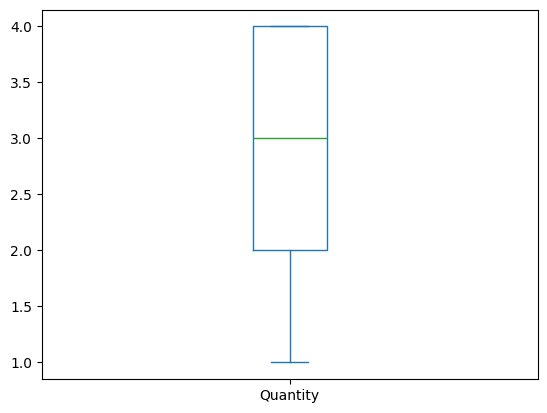

In [343]:
df['Quantity'].plot(kind='box')

#### Bivariate Analysis

<Axes: xlabel='Region'>

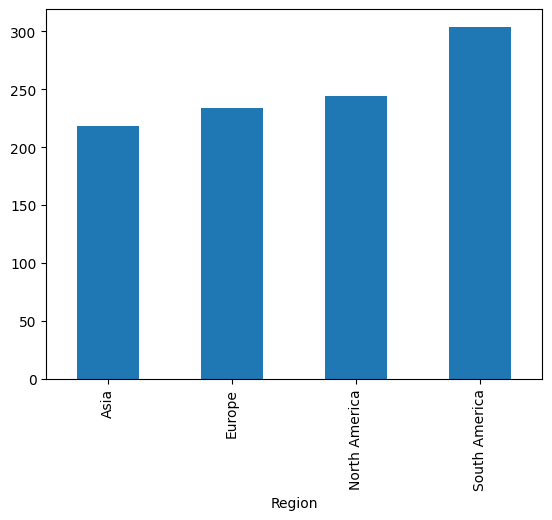

In [344]:
df.groupby('Region')['TransactionID'].nunique().plot(kind='bar')

***We have high number of transactions from South America***

<Axes: xlabel='Category'>

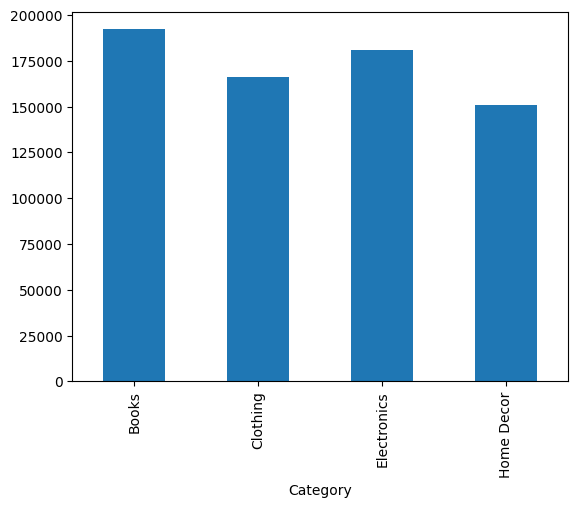

In [345]:
df.groupby('Category')['TotalValue'].sum().plot(kind='bar')

***Books gives the highest revenue***

#### Multivariate Analysis

<Axes: xlabel='YearMonth'>

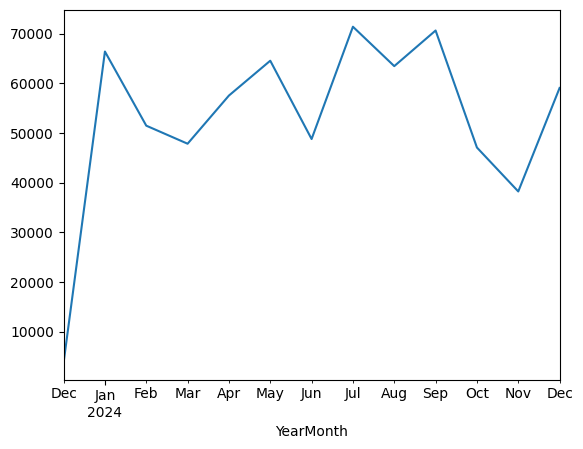

In [346]:
df.groupby('YearMonth')['TotalValue'].sum().plot(kind='line')

<Axes: xlabel='Region'>

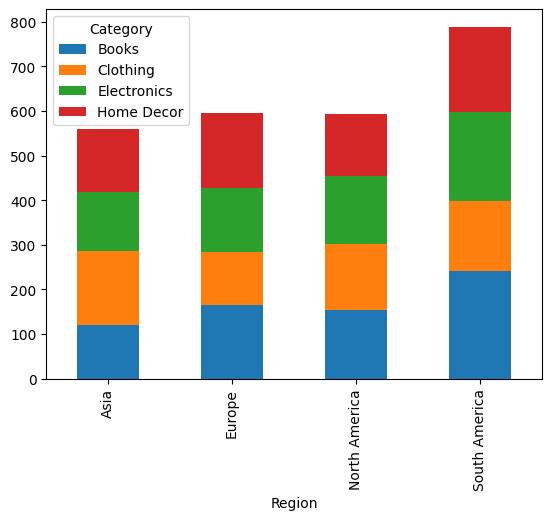

In [347]:
region_category = df.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
region_category.plot(kind='bar', stacked=True)

***South America leads in buying in almost every Category of Products***

In [348]:
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

<Axes: xlabel='DayOfWeek'>

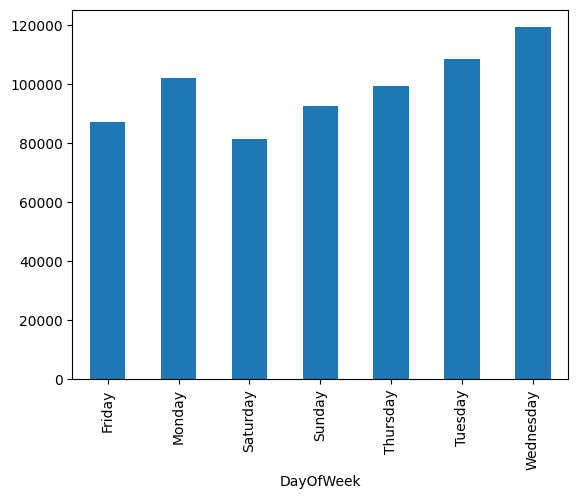

In [349]:
df.groupby('DayOfWeek')['TotalValue'].sum().plot(kind='bar')

#### Customer Behaviour

In [350]:
high_value_customers = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(high_value_customers.head(10))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


***The above customers are the high value customers with the highest spending***

#### Overall Insights
- South America is a key region for high-value sales, especially in Home Decor.
- Books consistently perform well across all regions and lead in overall sales.
- Seasonal or promotional patterns (e.g., January and December spikes) are evident and should be targeted for marketing efforts.
- Categories like Clothing and Electronics can benefit from additional focus to increase their shares in underperforming regions.
- The Decline in signups from 2022 to 2023 and a good recovery in 2024 Suggests a good Strategy Implementation it should be continued
- Can Focus more on High Valued Customers